<a href="https://colab.research.google.com/github/Real-Hyuk/AISec_CAU/blob/master/0917_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

In [5]:
def build_model(width, height, channel):
    model = Sequential()
    
    model.add(Conv2D(
        filters = 16,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu',
        input_shape = (width, height, channel)
    ))

    model.add(Conv2D(
        filters = 16,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu'
    ))

    model.add(MaxPooling2D(
        pool_size = (2,2),
        padding = 'same'
    ))

    model.add(Conv2D(
        filters = 32,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu'
    ))

    model.add(MaxPooling2D(
        pool_size = (2,2),
        padding = 'same'
    ))

    model.add(Conv2D(
        filters = 64,
        kernel_size = (3,3),
        padding = 'same',
        activation = 'relu'
    ))

    model.add(AveragePooling2D(
        pool_size = (8,8),
        padding = 'same'
    ))

    model.add(Flatten())

    model.add(Dense(
        units = 640,
        activation = 'relu'
    ))

    model.add(Dense(
        units = 10,
        activation = 'softmax'
    ))

    opt = Adam(learning_rate=0.001)
    
    model.compile(
        optimizer = opt,
        loss = scc,
        metrics = ['accuracy']
    )

    return model

In [11]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3])

hist = model.fit(
    X_train, Y_train, 
    batch_size = 16, epochs = 10, 
    verbose = 1, 
    shuffle = True, validation_split = 0.1
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
2813/2813 [==============================] - 98s 35ms/step - loss: 1.5384 - accuracy: 0.4282 - val_loss: 1.2873 - val_accuracy: 0.5450
Epoch 2/10
2813/2813 [==============================] - 104s 37ms/step - loss: 1.1621 - accuracy: 0.5816 - val_loss: 1.1810 - val_accuracy: 0.5806
Epoch 3/10
2813/2813 [==============================] - 99s 35ms/step - loss: 1.0115 - accuracy: 0.6426 - val_loss: 0.9908 - val_accuracy: 0.6524
Epoch 4/10
2813/2813 [==============================] - 99s 35ms/step - loss: 0.9214 - accuracy: 0.6728 - val_loss: 0.8990 - val_accuracy: 0.6892
Epoch 5/10
2813/2813 [==============================] - 99s 35ms/step - loss: 0.8475 - accuracy: 0.7035 - val_loss: 0.9569 - val_accuracy: 0.6830
Epoch 6/10
2813/2813 [==============================] - 98s 35ms/step - loss: 0.8017 - accuracy: 0.7199 - val_loss: 0.9198 - val_accuracy: 0.6916
Epoch 7/10
2813/2813 [==============================] - 99s 35ms/step - loss: 0.7572 - accuracy: 0.7340 - val_loss: 0.8549 

[0.9053384065628052, 0.6977999806404114]

In [12]:
import matplotlib.pyplot as plt

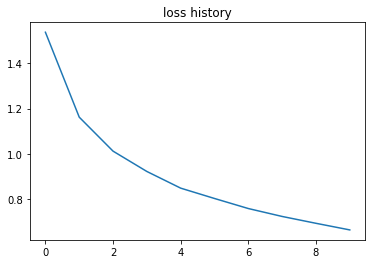

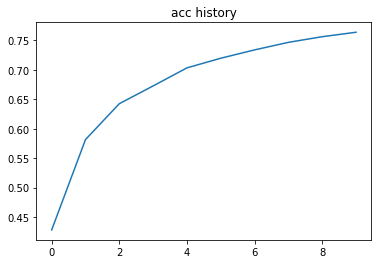

In [13]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()